In [103]:
#########################################
#            Image Sharpening           #
#                                       #
# Grenoble INP - Phelma                 #
# SICOM                                 #
#                                       #
# Edna FRICKE                           #
# Henrique LEFUNDES DA SILVA            #
# Lennard FRANZ                         #
#                                       #
# 08/11/2023                            #
#########################################

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
from scipy.signal import convolve2d

In [105]:
def is_gray(img):
    if len(img.shape) == 2:
        return True
    else:
        return False

def create_laplacian(k = 13):
    if k < 12:
        raise ValueError('k must be greater than 12')
    
    # The value of C must be k - 12 
    # k > 12 to ensure that the sum of the filter is 1
    # C = k - 12
    # To compensate the fact that we are adding the image C times we divide the filter by C
    kernel = (1/(k-12))*np.array([[-1, -2, -1], 
                                    [-2, k, -2], 
                                    [-1, -2, -1]])
    
    return kernel

def apply_laplacian(img, laplacian_filter):
    if is_gray(img):
        laplacian_img = convolve2d(img, laplacian_filter, mode='same')
    else:
        img_lab = color.rgb2lab(img)
        laplacian_img = img_lab.copy()
        laplacian_img[:,:,0] = convolve2d(img_lab[:,:,0], laplacian_filter, mode='same')
        laplacian_img = color.lab2rgb(laplacian_img)

    return laplacian_img

def sharpen_image(img, k = 13):
    '''
    Sharpen an image using the Laplacian filter
    
    Parameters
    ----------
    img : ndarray
        Image to be sharpened
    k : int, optional
        Value of the filter. The default is 13.
        If k > 13, the image will be less sharpened (more identical to the original image)
        
    Returns
    -------
    laplacian_img : ndarray
        Sharpened image.
    '''
    laplacian_filter = create_laplacian(k)
    laplacian_img = apply_laplacian(img, laplacian_filter)
    return laplacian_img

C:\Users\rickl\AppData\Local\Temp\ipykernel_23916\3320106308.py:28: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 319 negative Z values that have been clipped to zero
  laplacian_img = color.lab2rgb(laplacian_img)


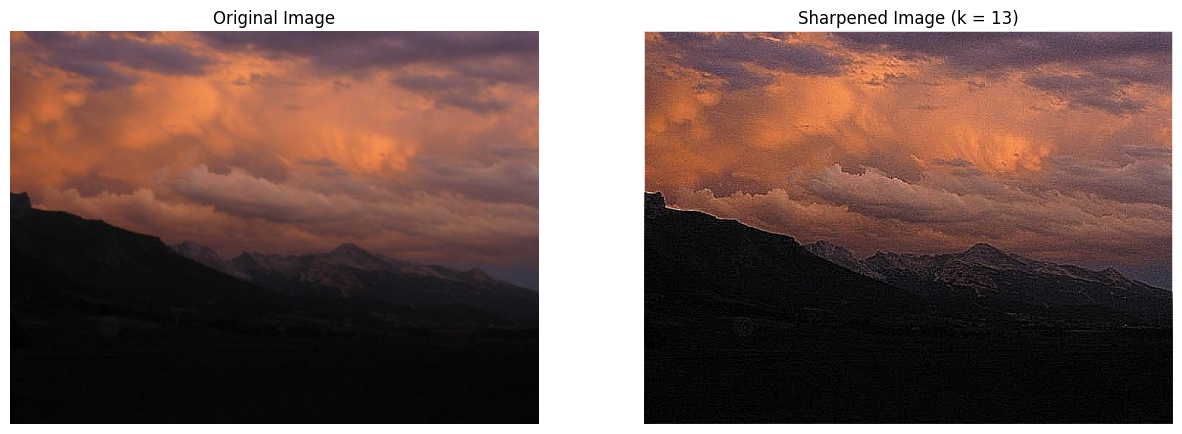

In [106]:
# Load image
img = io.imread('images/Paysage.jpg')
# Sharpen the image
k = 13
sharpened_img = sharpen_image(img, k)

plt.subplot(1, 2, 1)
if is_gray(img):
    # Show the sharpened image
    plt.imshow(img, cmap='gray')
else:
    plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
# makes the plot bigger
plt.subplot(1, 2, 2)
if is_gray(sharpened_img):
    # Show the sharpened image
    plt.imshow(sharpened_img, cmap='gray')
else:
    plt.imshow(sharpened_img)
plt.title(f'Sharpened Image (k = {k})')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.show()